# [Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df = pd.read_excel("data/sample-salesv3.xlsx")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [2]:
top_10 = (df.groupby("name")["ext price", "quantity"].agg({'ext price': 'sum', 'quantity': 'count'})
            .sort_values(by='ext price', ascending=False))[:10].reset_index()

top_10.rename(columns = {'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [3]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


# Bar Chart

Matplotlib has many different styles available for rendering plots. You can see which ones are available on your system using `plt.style.available` .

In [4]:
plt.style.available

['seaborn-deep',
 'fivethirtyeight',
 'classic',
 'seaborn-dark-palette',
 'grayscale',
 'seaborn-notebook',
 'Solarize_Light2',
 'fast',
 'ggplot',
 'seaborn-colorblind',
 'bmh',
 'seaborn-talk',
 'seaborn-white',
 'seaborn-muted',
 'seaborn-poster',
 'seaborn-dark',
 'seaborn-bright',
 'seaborn-ticks',
 'tableau-colorblind10',
 'seaborn-paper',
 '_classic_test',
 'seaborn-whitegrid',
 'seaborn-pastel',
 'dark_background',
 'seaborn-darkgrid',
 'seaborn']

In [35]:
plt.style.use('ggplot')

the first step is to plot the data using the standard pandas plotting function:

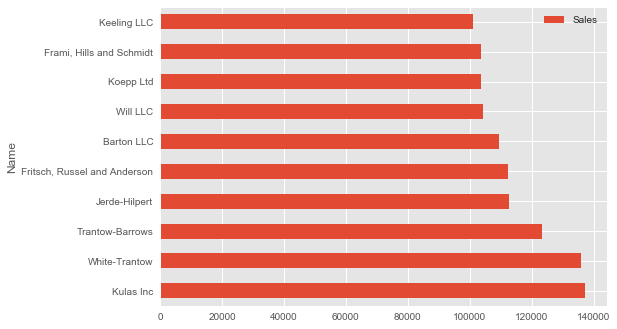

In [36]:
top_10.plot(kind='barh', y='Sales', x='Name')

# Customizing the Plot

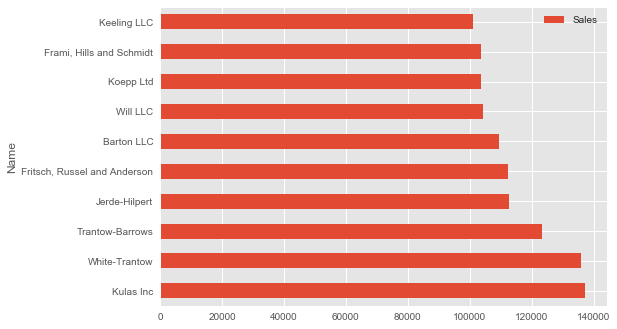

In [37]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

The resulting plot looks exactly the same as the original but we added an additional call to `plt.subplots()` and passed the `ax` to the plotting function. Why should you do this? Remember when I said it is critical to get access to the axes and figures in matplotlib? That’s what we have accomplished here. Any future customization will be done via the `ax` or `fig` objects.

We have the benefit of a quick plot from pandas but access to all the power from matplotlib now. 

Suppose we want to tweak the x limits and change some axis labels? Now that we have the axes in the `ax` variable, we have a lot of control:

(-10000, 140000)

Text(0.5, 0, 'Total Revenue')

Text(0, 0.5, 'Customer')

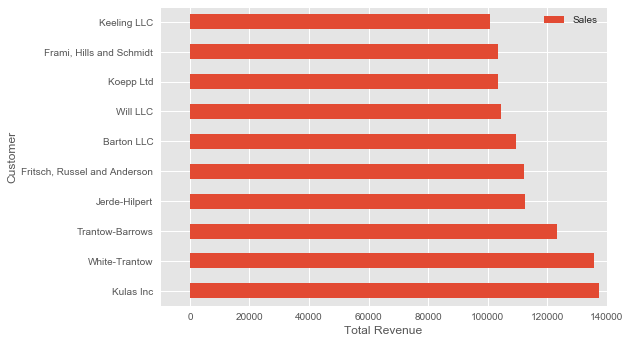

In [38]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')

(-10000, 140000)

[Text(0, 0.5, 'Customer'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, '2014 Revenue')]

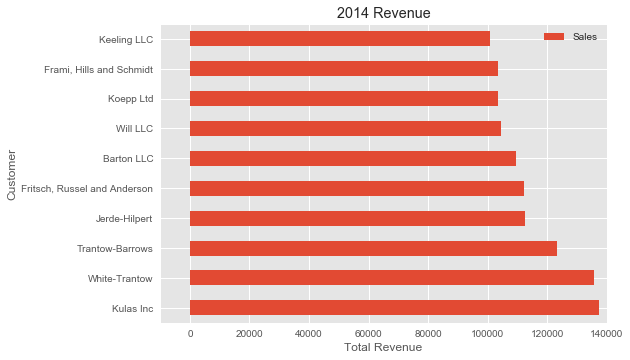

In [39]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

To further demonstrate this approach, we can also adjust the size of this image. By using the `plt.subplots()` function, we can define the `figsize` in inches. We can also remove the legend using `ax.legend().set_visible(False)`

(-10000, 140000)

[Text(0, 0.5, 'Customer'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, '2014 Revenue')]

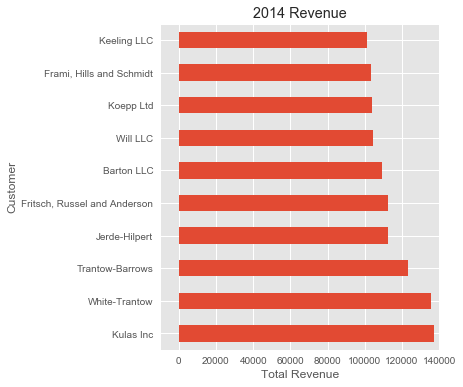

In [40]:
fig, ax = plt.subplots(figsize=(5,6))
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", ylabel='Customer', xlabel='Total Revenue')
ax.legend().set_visible(False)

There are plenty of things you probably want to do to clean up this plot. One of the biggest eye sores is the formatting of the Total Revenue numbers. Matplotlib can help us with this through the use of the `FuncFormatter` . This versatile function can apply a user defined function to a value and return a nicely formatted string to place on the axis.

In [41]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

(-10000, 140000)

[Text(0, 0.5, 'Customer'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, '2014 Revenue')]

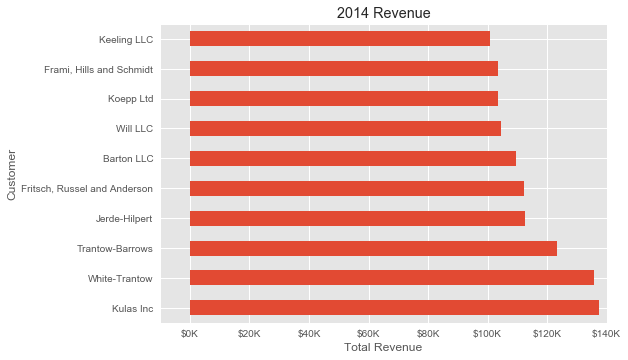

In [42]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

**Ability to add annotations to the plot:** In order to draw a vertical line, you can use `ax.axvline()` and to add custom text, you can use `ax.text()` .

(-10000, 140000)

[Text(0, 0.5, 'Customer'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, '2014 Revenue')]

Text(115000, 3, 'New Customer')

Text(115000, 5, 'New Customer')

Text(115000, 8, 'New Customer')

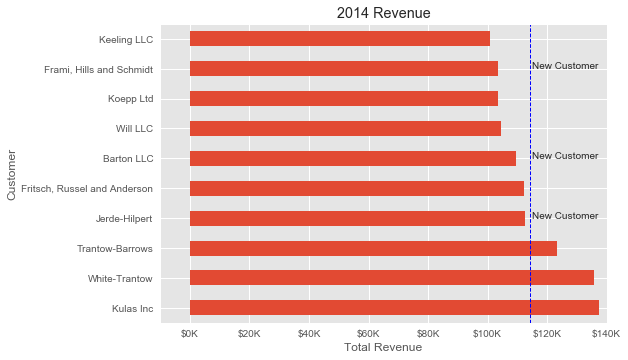

In [43]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the average
top_10.plot(kind='barh', x='Name', y='Sales', ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel = 'Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, 'New Customer')
    
# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

# Figures and Plots

We can accomplish this using `plt.subplots()` :

`fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))`

`sharey=True` so that the yaxis will share the same labels.

(-10000, 140000)

[Text(0, 0.5, 'Customers'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Revenue')]

[Text(0, 0.5, ''), Text(0.5, 0, 'Total Units'), Text(0.5, 1.0, 'Units')]

Text(0.5, 0.98, '2014 Sale Analysis')

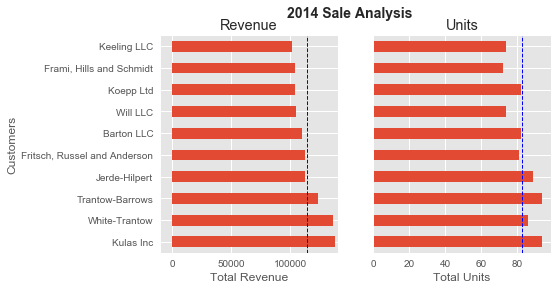

In [57]:
# Get the figure and axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,4))

top_10.plot(kind='barh', x='Name', y='Sales', ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', x='Name', y='Purchases', ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1 )

# Title the figure
fig.suptitle('2014 Sale Analysis', fontsize=14, fontweight='bold')

# Hide the legends
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

# Saving a figure in a specific format

You can use `fig.canvas.get_supported_filetypes()` to see what your system supports

In [58]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

In [59]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

This version saves the plot as a png with opaque background. I have also specified the `dpi` and `bbox_inches="tight"` in order to minimize excess white space.

![](https://pbpython.com/images/matplotlib-pbpython-example.png)